<a href="https://colab.research.google.com/github/iypc-team/CoLab/blob/master/PTBlackjack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import
import glob, os, shutil
from os.path import *
from pathlib import Path
from google.colab import drive

drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)
contentPth=str(Path.cwd())
os.chdir('/content/drive/My Drive/PythonFiles')

Mounted at /content/drive


In [2]:
import ImportDriveFiles
from BashColors import C
from GetTPU import *
# gt.startTPU()
tpuStrategy=gt.tpu_strategy


In [3]:

os.chdir('/content/drive/My Drive/PT/Fundamentals')
dirList=glob.glob('*.py')
pth=None
pathList=[]
projectDict={}
counter=0
for filName in dirList:
    fullPath=abspath(filName)
    if fullPath.__contains__('blackJack'):
        counter+=1
        projectDict[counter]=fullPath
        pathList.append(fullPath)
        # print(f'{counter}. {C.Green}{fullPath}{C.White}')
for pth in sorted(pathList):
    bn=basename(pth)
    name=os.path.splitext(bn)
    thisModule=name[0]
    print(f'{thisModule}')
    
import control_blackJack_no_es
import main_control_blackJack_no_es
import main_prediction_blackJack as mmain
import prediction_blackJack

os.chdir('/content')

control_blackJack_no_es
main_control_blackJack_no_es
main_prediction_blackJack
prediction_blackJack


In [4]:
def copyToContent(path_list):
    os.chdir('/content')
    print(f'{C.Green}Copied to "/content" directory:{C.White}')
    for pth in path_list:
        sourcePath=pth
        destinationPath= os.path.join('/content', basename(pth))
        shutil.copy(sourcePath, destinationPath)
        print(basename(destinationPath))
copyToContent(path_list=pathList)

Copied to "/content" directory:
control_blackJack_no_es.py
main_control_blackJack_no_es.py
main_prediction_blackJack.py
prediction_blackJack.py


episode: 0 win rate 0.0 percent
episode: 25000 win rate 40.1 percent
episode: 50000 win rate 40.7 percent
episode: 75000 win rate 40.8 percent
episode: 100000 win rate 40.9 percent
episode: 125000 win rate 41.0 percent
episode: 150000 win rate 41.0 percent
episode: 175000 win rate 41.1 percent
episode: 200000 win rate 41.2 percent
episode: 225000 win rate 41.2 percent
episode: 250000 win rate 41.3 percent
playing 250000 games took...
tpu elapse time: 128.46590924263



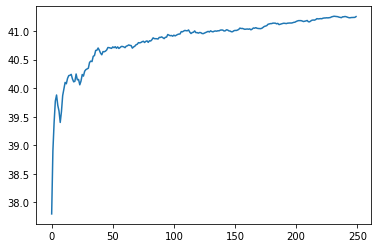

In [5]:
import gym
import matplotlib.pyplot as plt
from control_blackJack_no_es import Agent
import FunctionTimer
from FunctionTimer import ft
startTime=ft.getTimeStamp()

if __name__=='__main__':
    env=gym.make('Blackjack-v0')
    agent=Agent(eps=0.001) # default eps=0.001
    n_episodes=250001
    win_loose_draw={-1:0, 0:0, 1:0}
    win_rates=[]
    for i in range(n_episodes):
        if i > 0 and i % 1000==0:
            pct=win_loose_draw[1] / i
            pct=pct*100
            win_rates.append(pct)
            # print(f'{C.Green}{round(pct,1)} percent{C.ColorOff}')
        
        if i % 25000 == 0:
            rates=win_rates[-1] if win_rates else 0.0
            print(f'episode: {i} win rate {round(rates,1)} percent')
        observation=env.reset()
        done=False
        while not done:
            action=agent.choose_action(state=observation)
            observation_, reward, done, info = env.step(action=action)
            agent.memory.append((observation, action, reward))
            observation=observation_
        agent.update_Q()
        win_loose_draw[reward]+=1
    plt.plot(win_rates)
    plt.show

endTime=ft.getTimeStamp()
print(f'playing {C.BIPurple}{n_episodes-1} games took...')
ft.tpuTiming(start=startTime, end=endTime)
print(f'{C.ColorOff}')